In [2]:
import pandas as pd
import json

# 1. Obtain Data

In [3]:
jsondata = open('complaints-2019-11-08_19_40.json')
data = json.loads(jsondata.read())

#### Inspect Data

In [4]:
data[0]

{'_score': 0.0,
 '_type': 'complaint',
 '_id': '2332260',
 '_source': {'company_public_response': 'Company has responded to the consumer and the CFPB and chooses not to provide a public response',
  'timely': 'Yes',
  'product': 'Debt collection',
  'sub_issue': 'Frequent or repeated calls',
  'tags': None,
  'sub_product': 'I do not know',
  'company': 'ProCollect, Inc',
  'date_sent_to_company': '2017-02-07T12:00:00-05:00',
  'consumer_disputed': 'No',
  'date_received': '2017-02-07T12:00:00-05:00',
  'complaint_id': '2332260',
  'state': 'TX',
  'consumer_consent_provided': 'Consent provided',
  'complaint_what_happened': 'I am currently looking to discontinue my payment arrangements with Pro Collect Debt agency regarding my outstanding balance with XXXX Prior to today I did not have any previous issues but this is cause for concern since I do not want any further inconveniences with my credit. I made payment arrangements of {$100.00} due on the XXXX of each month and was contacted 

#### Normalize Data

In [5]:
data = pd.io.json.json_normalize(data)

In [6]:
data

,_score,_type,_id,_index,_source.company_public_response,_source.timely,_source.product,_source.sub_issue,_source.tags,_source.sub_product,...,_source.consumer_disputed,_source.date_received,_source.complaint_id,_source.state,_source.consumer_consent_provided,_source.complaint_what_happened,_source.submitted_via,_source.issue,_source.company_response,_source.zip_code
0,0.0,complaint,2332260,complaint-public-v2,Company has responded to the consumer and the ...,Yes,Debt collection,Frequent or repeated calls,None,I do not know,...,No,2017-02-07T12:00:00-05:00,2332260,TX,Consent provided,I am currently looking to discontinue my payme...,Web,Communication tactics,Closed with explanation,799XX
1,0.0,complaint,2346235,complaint-public-v2,Company has responded to the consumer and the ...,Yes,Debt collection,Attempted to collect wrong amount,None,"Other (i.e. phone, health club, etc.)",...,Yes,2017-02-15T12:00:00-05:00,2346235,TX,Consent not provided,None,Web,False statements or representation,Closed with explanation,762XX
2,0.0,complaint,3260060,complaint-public-v2,Company has responded to the consumer and the ...,Yes,Debt collection,"You told them to stop contacting you, but they...",None,Other debt,...,N/A,2019-05-31T12:00:00-05:00,3260060,UT,Consent provided,Pro Collect. Their phone number is ( XXXX ) XX...,Web,Communication tactics,Closed with explanation,840XX
3,0.0,complaint,3192881,complaint-public-v2,Company has responded to the consumer and the ...,Yes,Debt collection,Didn't receive enough information to verify debt,Older American,Other debt,...,N/A,2019-03-27T12:00:00-05:00,3192881,FL,Consent not provided,None,Web,Written notification about debt,Closed with explanation,34689
4,0.0,complaint,1889880,complaint-public-v2,Company has responded to the consumer and the ...,Yes,Debt collection,Debt is not mine,None,"Other (i.e. phone, health club, etc.)",...,Yes,2016-04-22T12:00:00-05:00,1889880,TX,Consent provided,"a woman out of XXXX, Texas broke into the drop...",Web,Cont'd attempts collect debt not owed,Closed with explanation,775XX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0.0,complaint,3309568,complaint-public-v2,Company has responded to the consumer and the ...,Yes,"Credit reporting, credit repair services, or o...",Their investigation did not fix an error on yo...,None,Credit reporting,...,N/A,2019-07-17T12:00:00-05:00,3309568,VA,Consent not provided,None,Web,Problem with a credit reporting company's inve...,Closed with explanation,23327
1085,0.0,complaint,3251139,complaint-public-v2,Company has responded to the consumer and the ...,Yes,Debt collection,Threatened or suggested your credit would be d...,None,Other debt,...,N/A,2019-05-22T12:00:00-05:00,3251139,TX,Consent provided,"Hello, I am having issues with the company Pro...",Web,Took or threatened to take negative or legal a...,Closed with explanation,762XX
1086,0.0,complaint,3256889,complaint-public-v2,Company has responded to the consumer and the ...,Yes,Debt collection,Attempted to collect wrong amount,None,Other debt,...,N/A,2019-05-29T12:00:00-05:00,3256889,TX,Consent provided,There is a debt reporting on my credit file fr...,Web,False statements or representation,Closed with explanation,773XX
1087,0.0,complaint,3372314,complaint-public-v2,Company has responded to the consumer and the ...,Yes,Debt collection,Debt is not yours,None,Other debt,...,N/A,2019-09-12T12:00:00-05:00,3372314,TX,Consent provided,I noticed an account on my credit report from ...,Web,Attempts to collect debt not owed,Closed with explanation,770XX


# 2. Prepare Data

In [7]:
import re

def pre_process(text):
    
    #lowercase
    text = str(text).lower()
    
    #remove tags
    text=re.sub("</?.*?>"," <> ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    text = re.sub(r'[\W_]', ' ', text)
    
    return text

data['text'] = data['_source.complaint_what_happened'] + data['_source.sub_issue']
data['text'] = data['text'].apply(lambda x:pre_process(x))
data['text'][2]

'pro collect their phone number is xxxx xxxx xxxx they have bought the bad debt for someone that has my name this person that shares my name from texas owed money to an apartment complex i ve never lived in texas the information they have does not match mine except my name i m easy to find since i m a responsible human being this company wants me to prove that i m not the person they are looking for by providing my drivers license info and social security number because of identity theft etc i m not about to provide this information to some random company that keeps calling me just because they are telling me that they are legit i ve told them they have the wrong person i ve told them i m not going to pay the debt for this other person who has my same name but they refuse to stop calling me and harassing me about the money owed you told them to stop contacting you but they keep trying'

# 3. Analyse Data

#### a. Calculate Term Frequencies (TF)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text           
import re

#load a set of stop words
additional_stopwords = ['xxxx', 'xxxx xxxx', 'xx xx', 'xx', 'id', 'nan']
stopwords=text.ENGLISH_STOP_WORDS.union(additional_stopwords)

#get the text column 
docs=data['text'].tolist()

#create a vocabulary of words, 
#ignore words that appear in 85% of documents, 
#eliminate stop words
cv=CountVectorizer(max_df=0.85,stop_words=stopwords, ngram_range=(1,2))
word_count_vector=cv.fit_transform(docs)

In [10]:
list(cv.vocabulary_.items())[:10]


[('currently', 6538),
 ('looking', 14188),
 ('discontinue', 8070),
 ('payment', 17228),
 ('arrangements', 1800),
 ('pro', 18184),
 ('collect', 4295),
 ('debt', 6931),
 ('agency', 955),
 ('regarding', 19903)]

In [ ]:
word_list = cv.get_feature_names();    
count_list = word_count_vector.toarray().sum(axis=0)

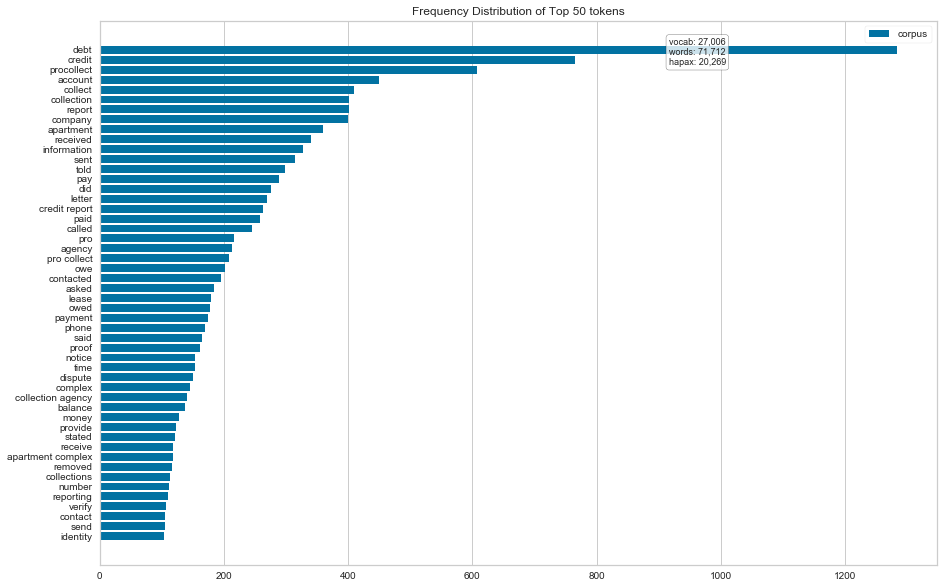

In [12]:
from yellowbrick.text import FreqDistVisualizer
features = cv.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='h',size=(1080, 720))
visualizer.fit(word_count_vector)
visualizer.show()

#### b. Compute IDF

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

#### c. Compute TF-IDF

In [14]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [15]:
# you only needs to do this once
feature_names=cv.get_feature_names()

#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(word_count_vector)

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,20)

for k in keywords:
    print(k,keywords[k])

knowledge accountdebt 0.629
accountdebt 0.629
familiar debt 0.528
invoice 0.526
trying apartment 0.503
lease debt 0.475
familiar 0.462
bond 0.461
knowledge 0.456
dog 0.451
account debt 0.449
electricity 0.442
tx paid 0.438
debt account 0.437
father 0.436
debt did 0.431
admission 0.422
appeal 0.42
paid credit 0.419
report know 0.404


# 4. Visualize Data

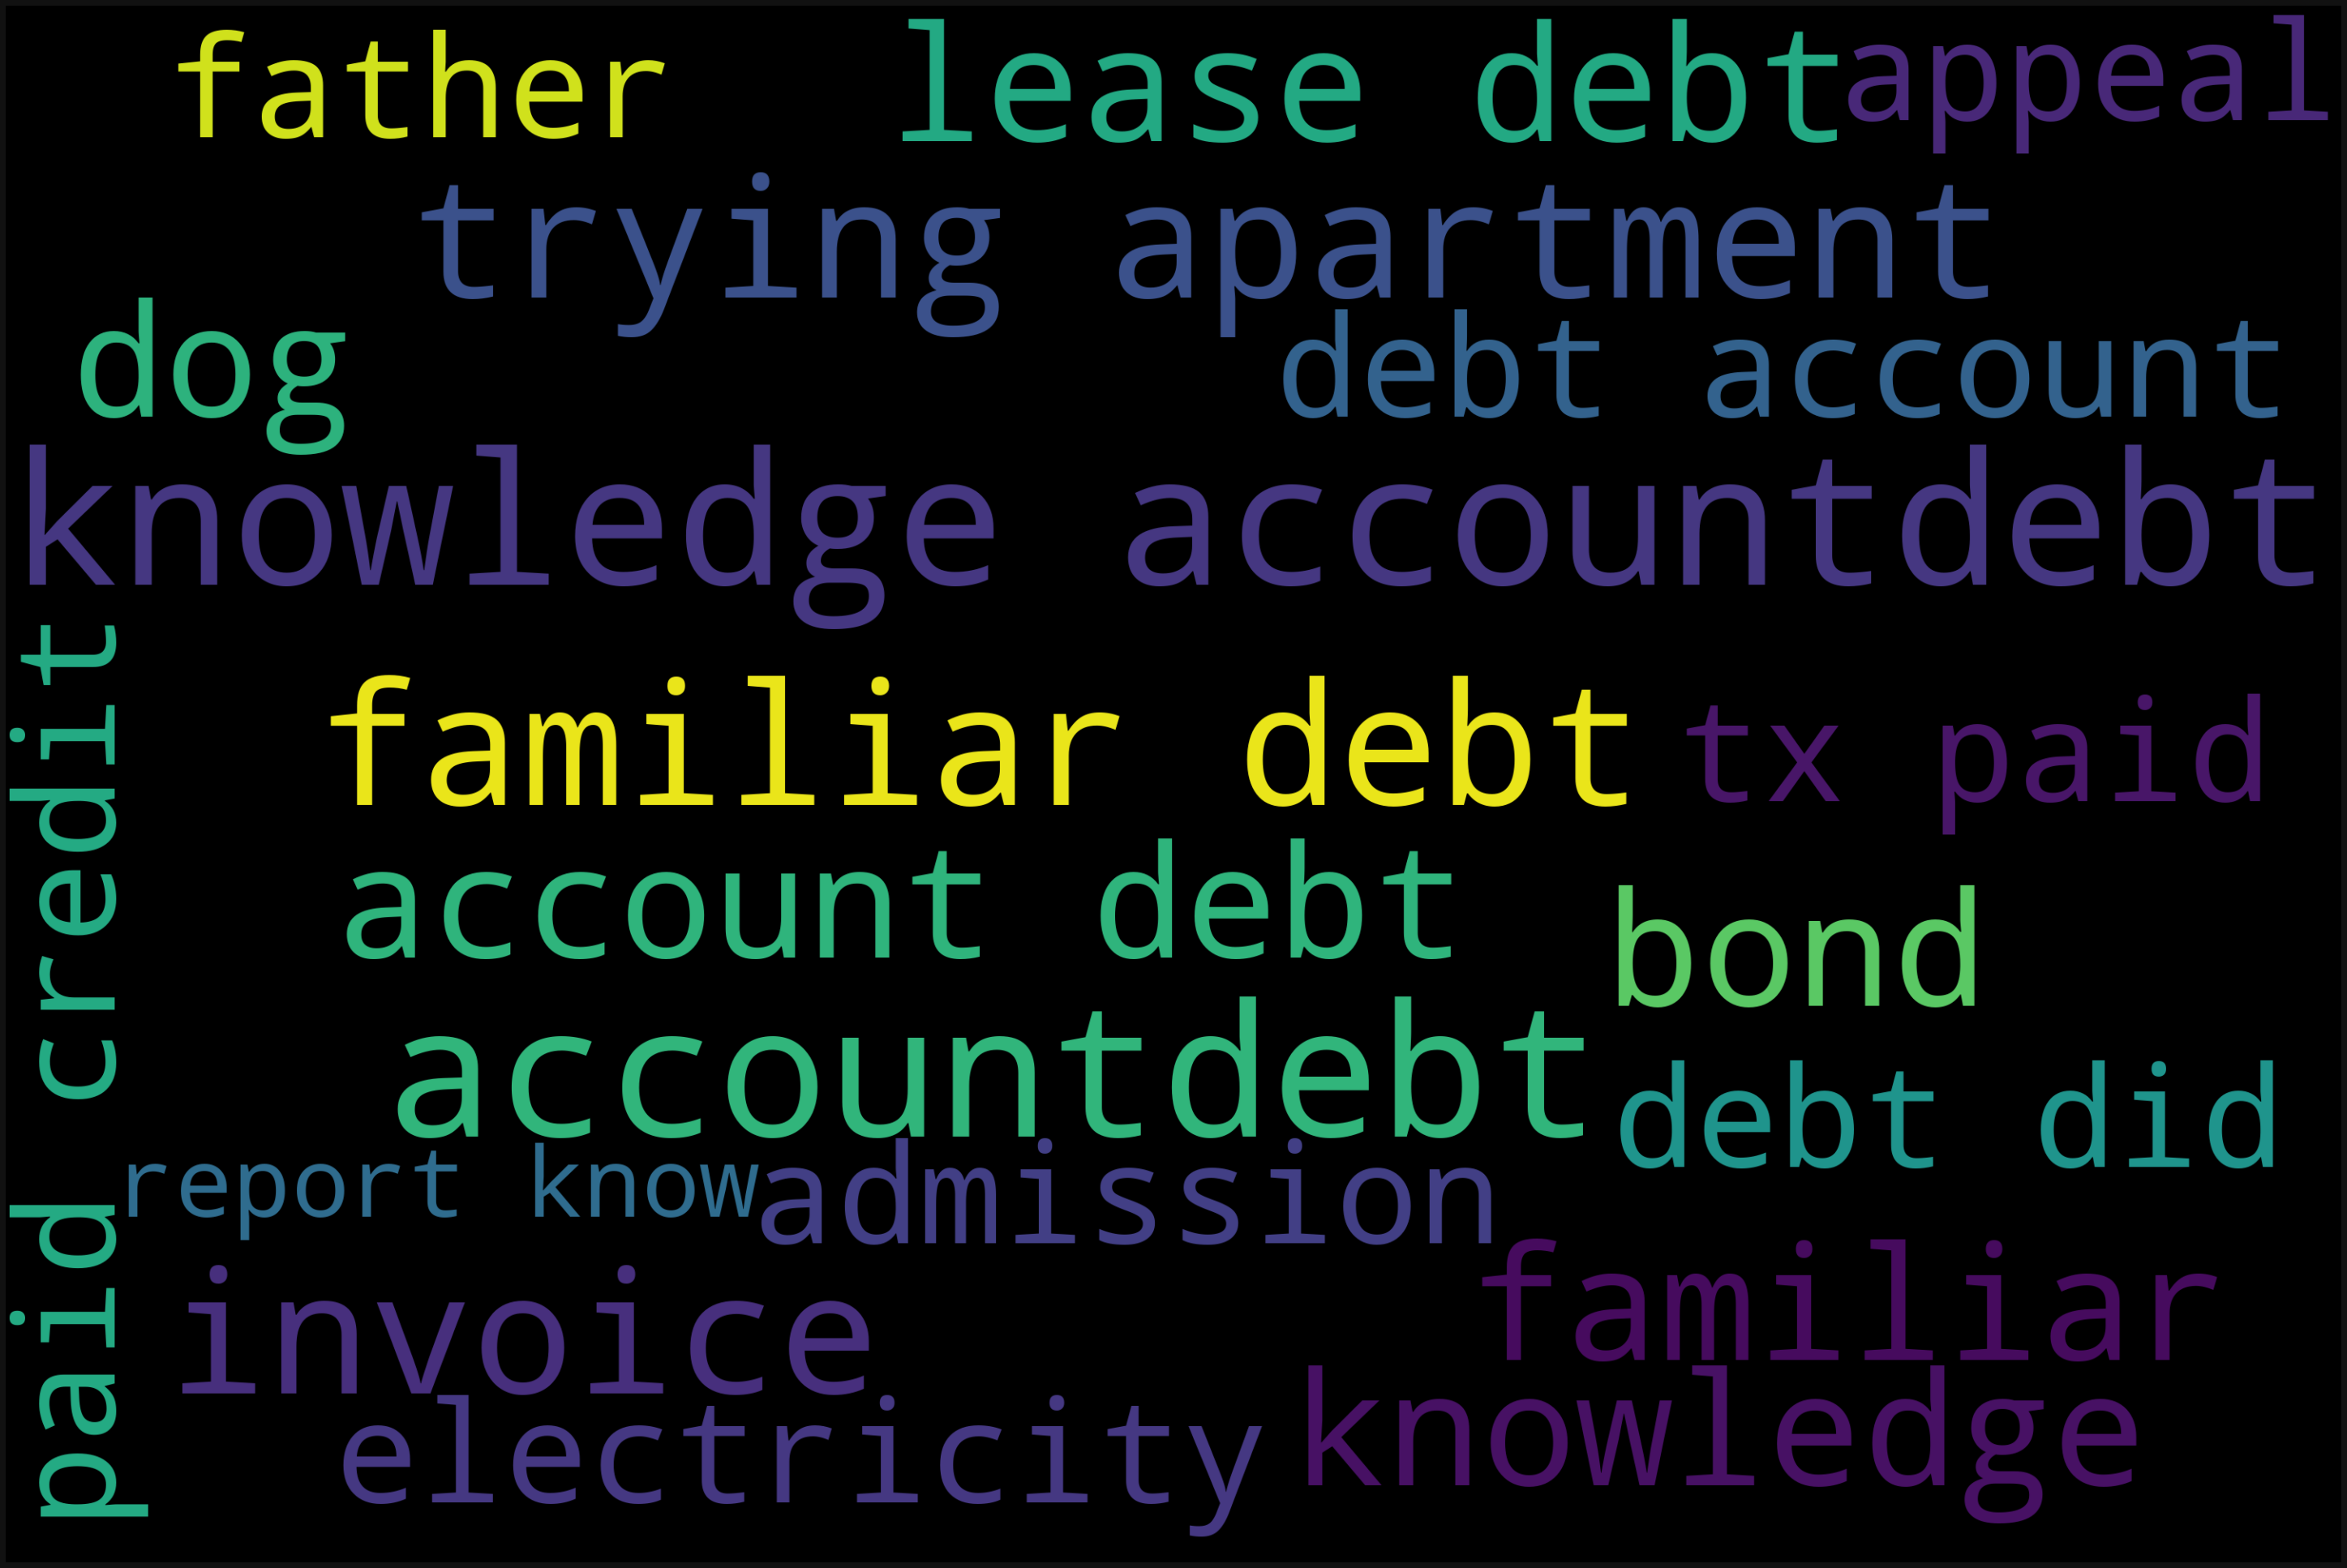

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = cv.get_feature_names()
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate_from_frequencies(keywords)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()